In [1]:
import arviz as az
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.ensemble import HistGradientBoostingRegressor

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [2]:
seed: int = sum(map(ord, "seed"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

In [3]:
x_raw, y = make_regression(
    n_samples=200,
    n_features=2,
    noise=0.5,
    n_informative=2,
    effective_rank=2,
    random_state=seed,
)

x = np.power(x_raw + np.max([np.abs(x_raw.min()), np.abs(x_raw).max()]), 0.8)

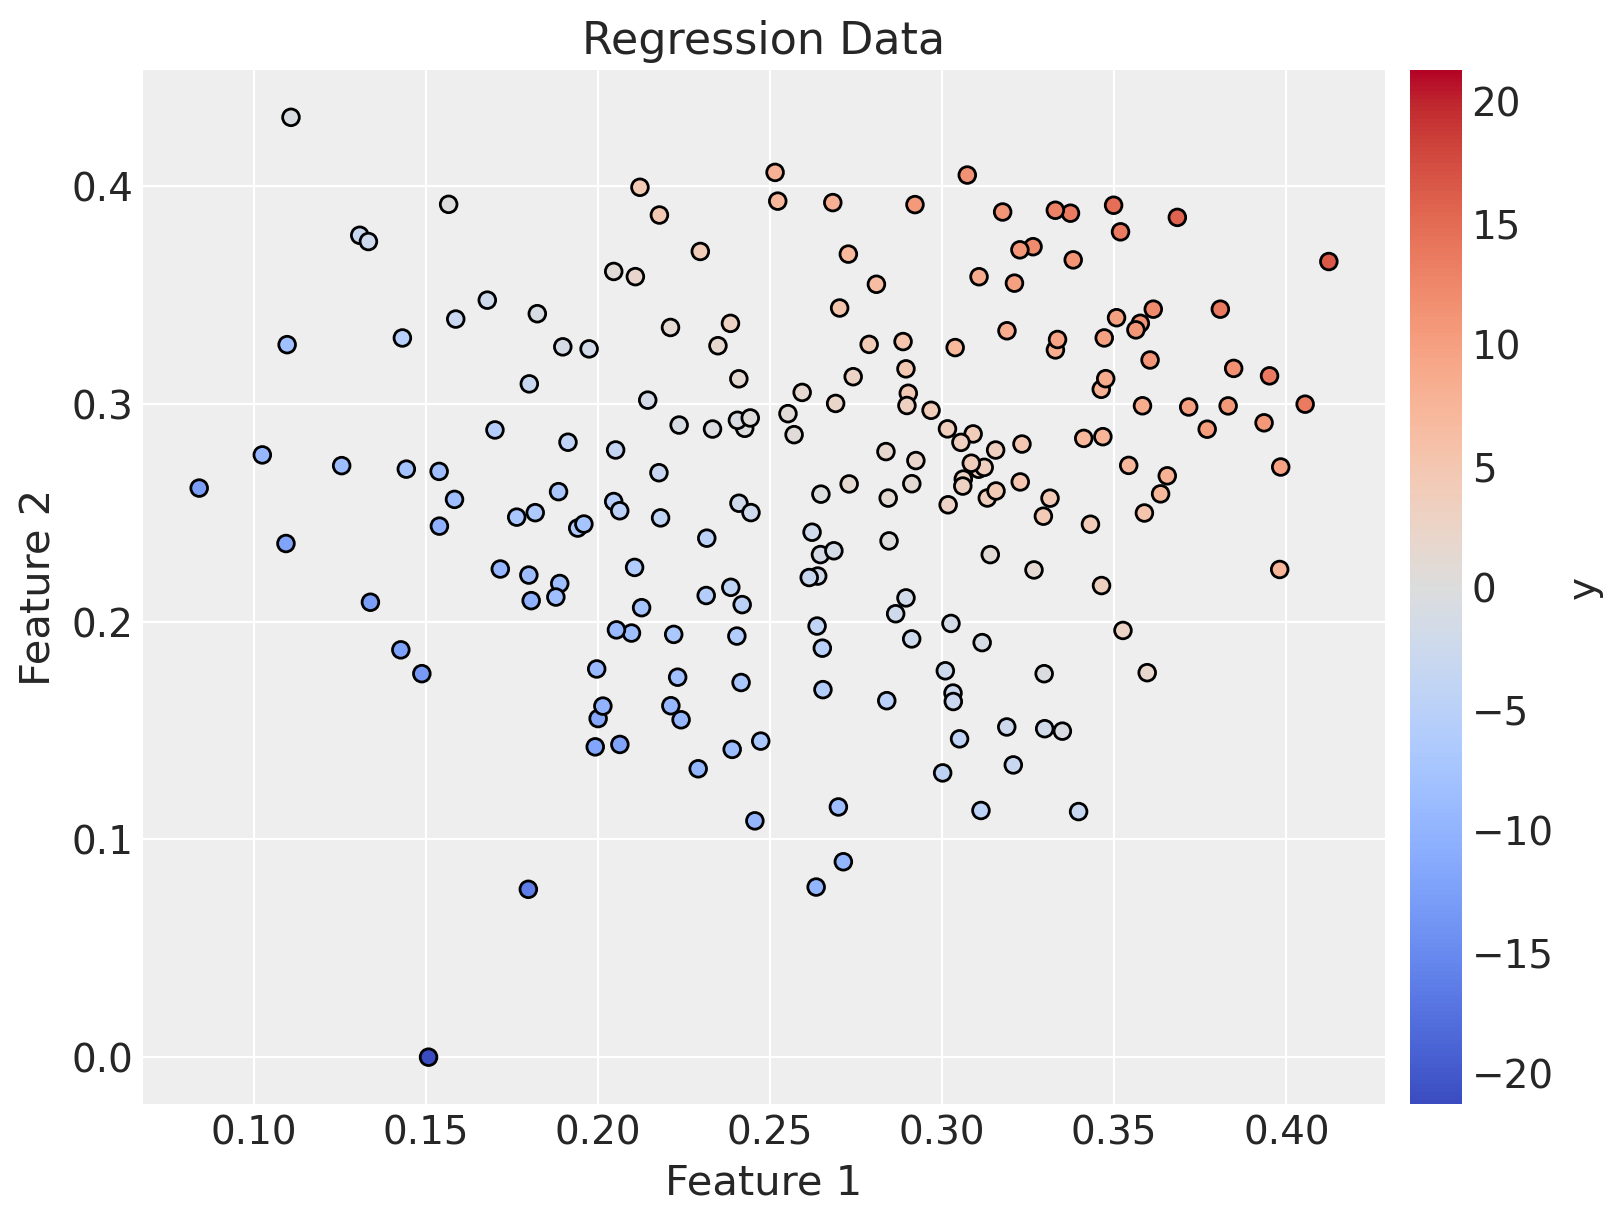

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

norm = mcolors.Normalize(vmin=-np.max(np.abs(y)), vmax=np.max(np.abs(y)))
sc = ax.scatter(x[:, 0], x[:, 1], c=y, cmap="coolwarm", norm=norm, edgecolors="black")
cbar = plt.colorbar(sc, ax=ax, pad=0.02)
cbar.set_label("y", fontsize=14)
ax.set(xlabel="Feature 1", ylabel="Feature 2", title="Regression Data");

In [5]:
model = HistGradientBoostingRegressor()

model.fit(x, y)

HistGradientBoostingRegressor()

In [6]:
y_pred = model.predict(x)

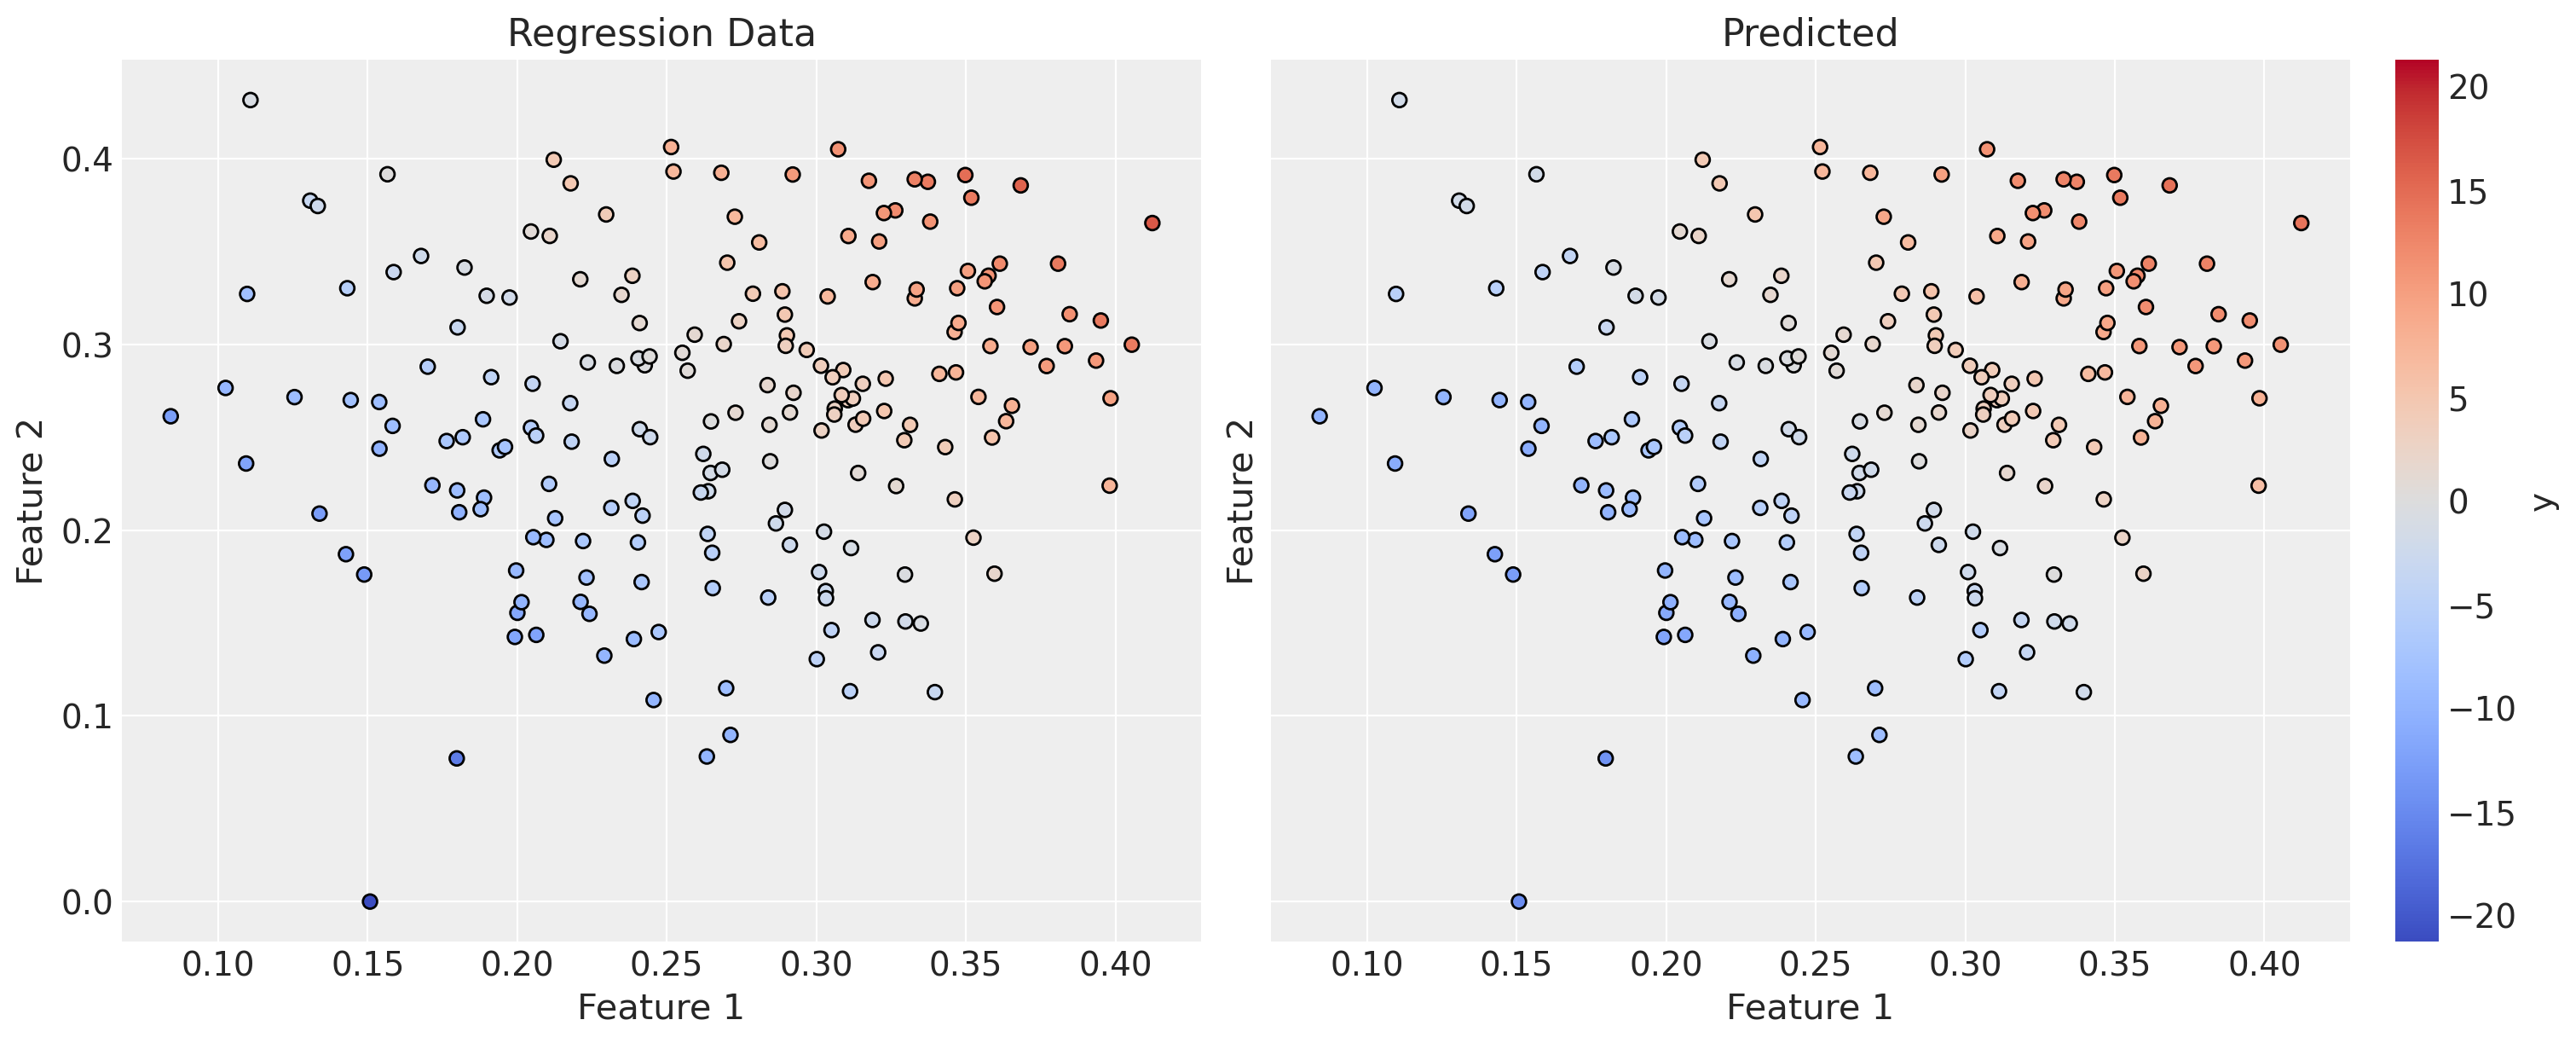

In [7]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 6), layout="constrained"
)

sc_0 = ax[0].scatter(
    x[:, 0], x[:, 1], c=y, cmap="coolwarm", norm=norm, edgecolors="black"
)

norm = mcolors.Normalize(vmin=-np.max(np.abs(y)), vmax=np.max(np.abs(y)))
cbar = plt.colorbar(sc_0, ax=ax, pad=0.02)
cbar.set_label("y", fontsize=14)


ax[0].set(xlabel="Feature 1", ylabel="Feature 2", title="Regression Data")

sc_1 = ax[1].scatter(
    x[:, 0], x[:, 1], c=y_pred, cmap="coolwarm", norm=norm, edgecolors="black"
)
ax[1].set(xlabel="Feature 1", ylabel="Feature 2", title="Predicted");

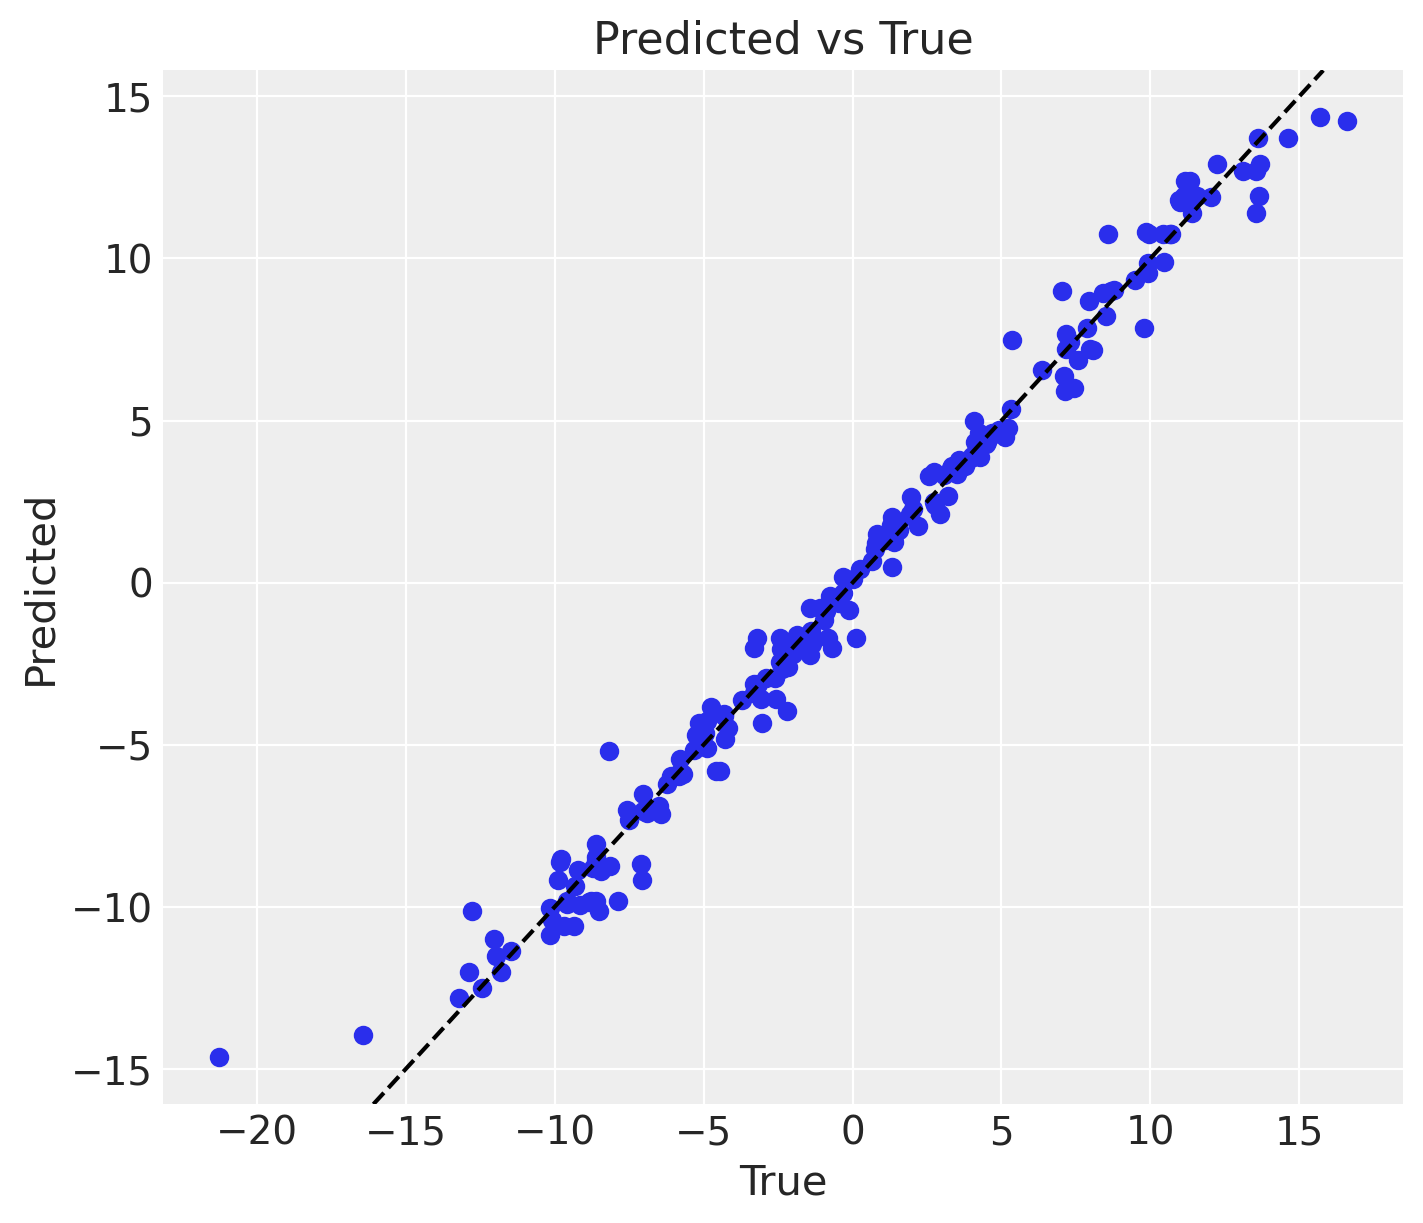

In [8]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(y, y_pred)
ax.axline(xy1=(0, 0), slope=1, color="black", linestyle="--")
ax.set(xlabel="True", ylabel="Predicted", title="Predicted vs True");